# DATA MINING - WEEK 8
## NGUYEN XUAN VIET DUC - 22280012
### Lesson 8: GROUP ANALYSIS (CON)

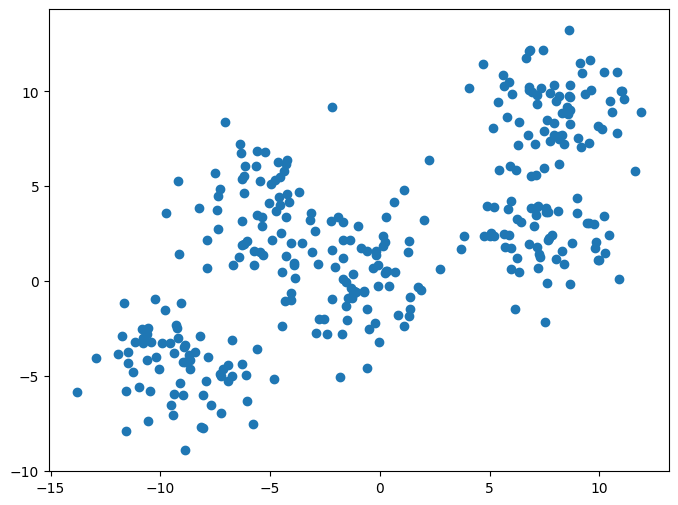

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from sklearn.cluster import KMeans
import pandas as pd

random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show()

In [16]:
gm = GaussianMixture(n_components=5).fit(x)
centers = gm.means_
centers

array([[-5.55836831,  3.87299888],
       [ 7.28418475,  2.56387124],
       [-0.90246061,  0.16230294],
       [-9.18288987, -4.47852917],
       [ 8.11454324,  9.24741885]])

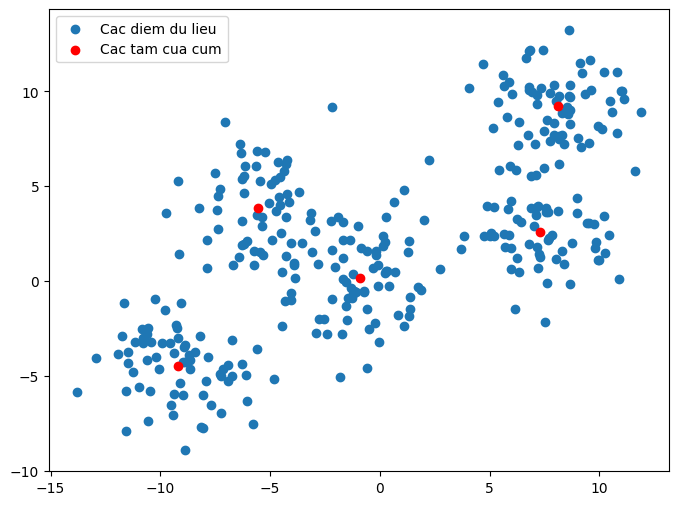

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label='Cac diem du lieu')
plt.scatter(centers[:,0], centers[:,1], c='r', label='Cac tam cua cum')
plt.legend()
plt.show()

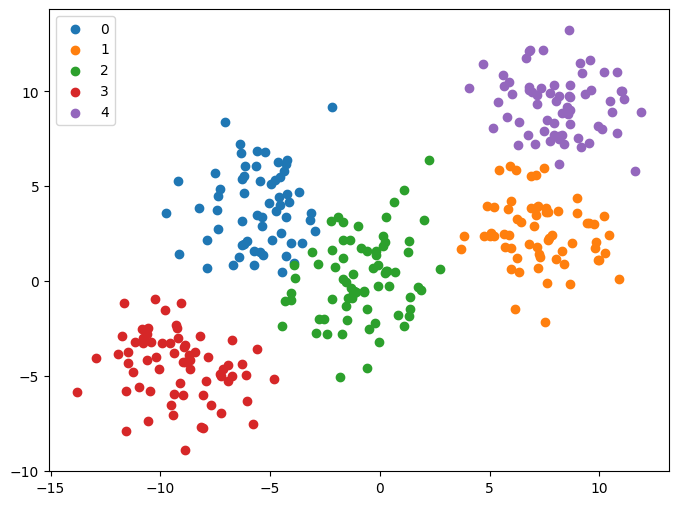

In [18]:
pred = gm.predict(x)

df = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

## Gaussian Mixture Algorithm

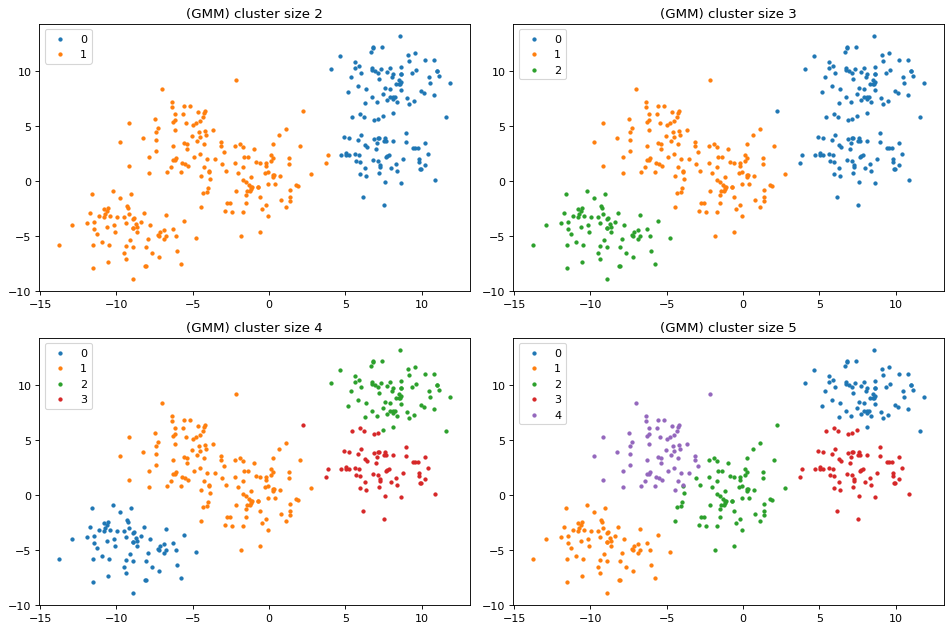

In [21]:
f = plt.figure(figsize=(12, 8), dpi=80)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': pred})
    groups = df.groupby('label')
    ax = f.add_subplot(2, 2, i-1)  
    for name, group in groups:
        ax.scatter(group.x, group.y, label=str(name), s=8)
    ax.set_title("(GMM) cluster size " + str(i))
    ax.legend()

plt.tight_layout()
plt.show()

## K-means Algorithm

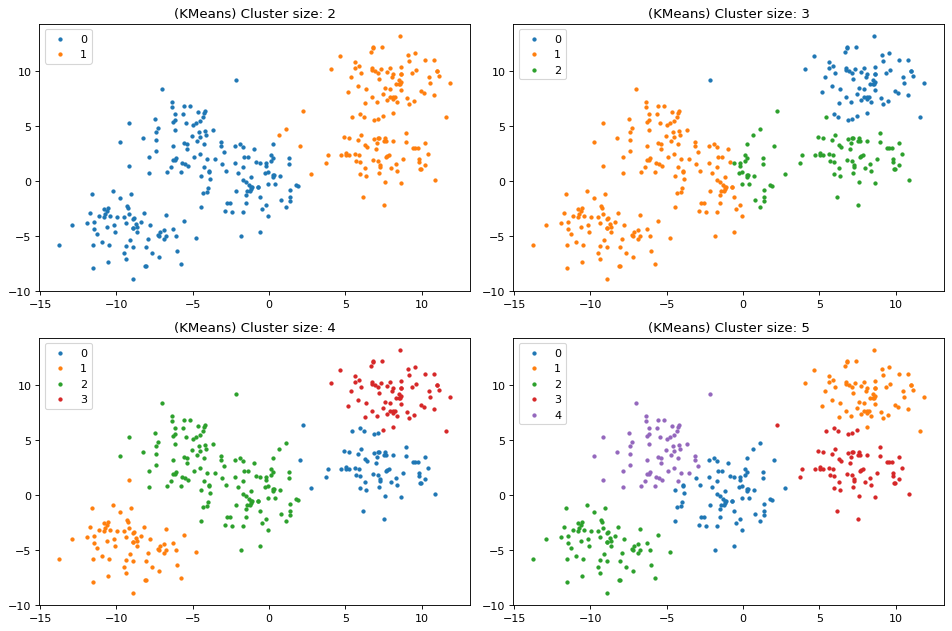

In [23]:
f = plt.figure(figsize=(12, 8), dpi=80)

for i in range(2, 6):
    km = KMeans(n_clusters=i).fit(x)
    pred = km.predict(x)
    df = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': pred})
    groups = df.groupby('label')
    ax = f.add_subplot(2, 2, i - 1)
    for name, group in groups:
        ax.scatter(group.x, group.y, label=name, s=8)
    ax.set_title("(KMeans) Cluster size: " + str(i))
    ax.legend()

plt.tight_layout()
plt.show()

## Mahalanobis k-means Algorithm

In [27]:
import numpy as np
from scipy.spatial.distance import mahalanobis

def mahalanobis_kmeans(X, K, max_iters=100, tol=1e-4, random_state=None):
    """
    Mahalanobis K-means clustering algorithm.

    Parameters:
        X: numpy array of shape (n_samples, n_features)
        K: number of clusters
        max_iters: maximum number of iterations
        tol: tolerance to stop
        random_state: random seed

    Returns:
        labels: cluster assignment for each point
        centers: list of cluster centers (means)
        covariances: list of cluster covariances
    """
    n_samples, n_features = X.shape
    rng = np.random.default_rng(random_state)

    # 1. Pick K points at random as initial cluster centers
    indices = rng.choice(n_samples, K, replace=False)
    centers = X[indices]

    # 2. Calculate Euclidean distance to each cluster center and assign clusters
    dists = np.linalg.norm(X[:, np.newaxis, :] - centers[np.newaxis, :, :], axis=2)
    labels = np.argmin(dists, axis=1)

    for iteration in range(max_iters):
        prev_labels = labels.copy()

        # 3. Form clusters
        clusters = [X[labels == k] for k in range(K)]

        # 4. Calculate Mahalanobis distance and reassign clusters
        covariances = []
        for k in range(K):
            if len(clusters[k]) > 1:
                cov = np.cov(clusters[k], rowvar=False)
            else:
                # Regularize if too few points
                cov = np.eye(n_features)
            covariances.append(cov)

        mahal_dists = np.zeros((n_samples, K))
        for k in range(K):
            VI = np.linalg.pinv(covariances[k])
            for i in range(n_samples):
                mahal_dists[i, k] = mahalanobis(X[i], centers[k], VI)
        labels = np.argmin(mahal_dists, axis=1)

        # 5. Recalculate cluster means and covariances
        new_centers = np.array([X[labels == k].mean(axis=0) if np.any(labels == k) else centers[k] for k in range(K)])
        shift = np.linalg.norm(new_centers - centers)
        centers = new_centers

        if np.all(labels == prev_labels) or shift < tol:
            break

    return labels, centers, covariances

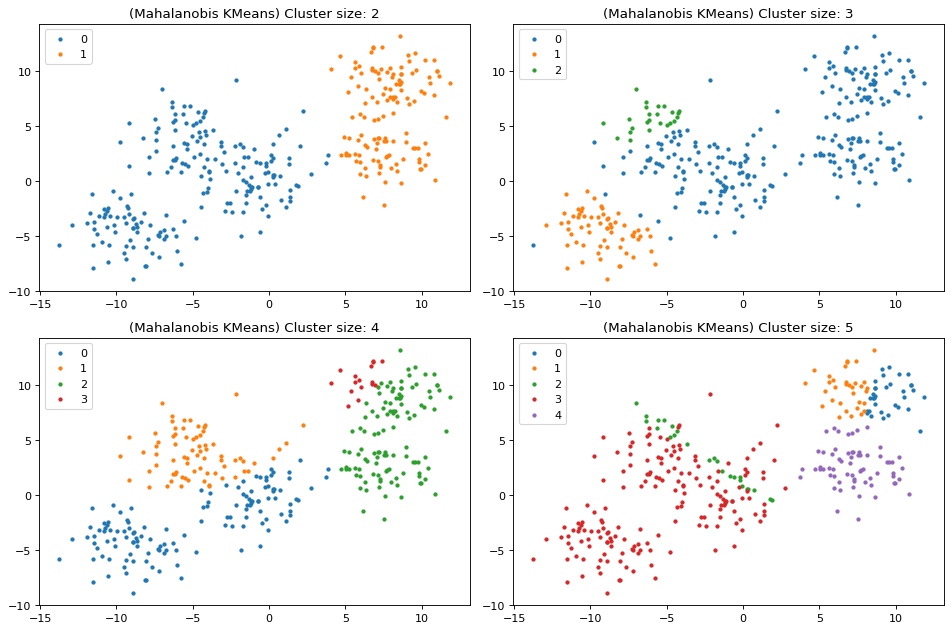

In [28]:
f = plt.figure(figsize=(12, 8), dpi=80)

for i in range(2, 6):
    labels, centers, covariances = mahalanobis_kmeans(x, K=i)
    df = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': labels})
    groups = df.groupby('label')
    ax = f.add_subplot(2, 2, i - 1)
    for name, group in groups:
        ax.scatter(group.x, group.y, label=name, s=8)
    ax.set_title("(Mahalanobis KMeans) Cluster size: " + str(i))
    ax.legend()

plt.tight_layout()
plt.show()